In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Lista

In [2]:
def impares(lista):
    return np.sort([i for i in lista if i % 2 != 0])[::-1][0:5].tolist()

In [3]:
lista_uniform = list(np.random.randint(1, 201, 50))
print(lista_uniform)

[120, 46, 193, 188, 132, 119, 198, 174, 3, 23, 77, 134, 136, 189, 195, 134, 158, 41, 14, 165, 53, 193, 127, 46, 72, 136, 146, 140, 34, 141, 20, 188, 108, 179, 167, 197, 192, 145, 103, 67, 65, 74, 143, 100, 72, 132, 75, 54, 54, 31]


In [4]:
impares(lista_uniform)

[197, 195, 193, 193, 189]

## Portafolio

In [5]:
def get_data(stocks, start_date, end_date):
    prices = yf.download(stocks, start_date, end_date, progress = False)["Close"]
    returns = prices.pct_change().dropna()
    mean_returns = returns.mean()
    cov_returns = returns.cov()
    return mean_returns, cov_returns, prices

def simular_precios(mean_returns, cov_returns, prices, num_dias, stocks, weights):

    N = 10000
    portfolio_return = np.dot(weights, mean_returns)

    portfolio_simulated_returns = np.zeros((num_dias, N)) # filas x columnas
    mean_returns = np.full(shape = (num_dias, len(stocks)), fill_value=portfolio_return)

    for m in range(N):
        L = np.linalg.cholesky(cov_returns)
        Z = np.random.normal(size=(num_dias, len(stocks))) # Matriz de n_dias (filas) y n_stocks (columnas)
        daily_returns = mean_returns.T + np.dot(L, Z.T)
        portfolio_simulated_returns [:, m] = np.cumprod(np.dot(weights, daily_returns) + 1)
    
    return portfolio_simulated_returns

In [6]:
stocks = ['KO','MCD']
weights = [0.5, 0.5]
start_date = '2022-03-08'
end_date = '2025-03-08'
num_dias = 90

In [7]:
mean_returns, cov_returns, prices = get_data(stocks, start_date, end_date)
portafolios_simulados = simular_precios(mean_returns, cov_returns, prices, num_dias, stocks, weights)

YF.download() has changed argument auto_adjust default to True


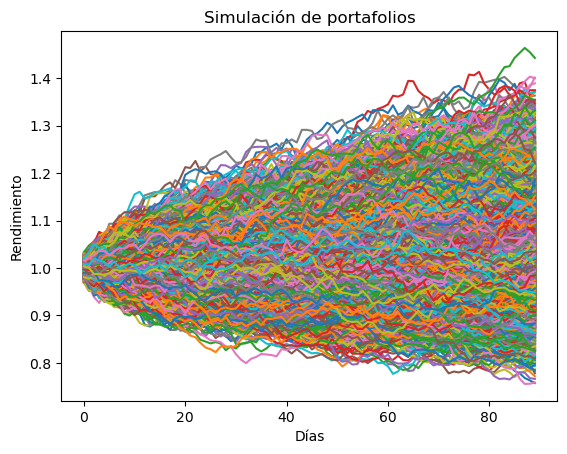

In [8]:
plt.plot(portafolios_simulados)
plt.ylabel('Rendimiento')
plt.xlabel('Días')
plt.title('Simulación de portafolios')
plt.show()

In [9]:
min_value = 10000 * portafolios_simulados[-1].min()
max_value = 10000 * portafolios_simulados[-1].max()

min_value, max_value

(7572.974279014416, 14430.264991882374)

In [10]:
pnl = portafolios_simulados[-1] - 1

In [11]:
var = np.percentile(pnl, 5)
var

-0.09443638225277996

Máximo a perder en 90 días con un 95% de confianza es 9.29 % que serían 929 dólares

In [12]:
cvar = pnl[pnl < var].mean()
cvar

-0.12754422914669647